1. El cliente X espera tener acuerdos de pago por valor de 8.000.000 de Pesos, basado en tu análisis de los datos el mes de Septiembre fue un mes en el que se cumplio el objetivo, fue bueno, malo, por que?

In [1]:
#importo las librerias necesarias para responder la pregunta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importo el dataset

df_clean = pd.read_csv(r"data/df_clean.csv", sep=";")

In [3]:
# Obtengo los registros con compromiso de pago y chequeo el monto total

columnas_objetivo_acuerdos = ['session_id', 'date', 'hour', 'success_type', 'Phone', "Cantidad"]
objetivo_acuerdos = df_clean[columnas_objetivo_acuerdos]


con_compromiso = objetivo_acuerdos[objetivo_acuerdos['success_type'] == "Compromiso pago"]
total_acuerdos_septiembre = con_compromiso["Cantidad"].sum()
total_acuerdos_septiembre

# el objetivo de 8.000.000 de Pesos se cumplió (10285458.979999999) para septiembre.

10285458.979999999

In [4]:
# Verifico si un usuario tiene mas de una propuesta, motivo que podria variar el resultado.

duplicados_phone = con_compromiso['Phone'].duplicated().any()
print(duplicados_phone)

True


In [5]:
# Habiendo chequeado que un mismo usuario contiene mas de una propuesta, Me quedo con la propuesta mas reciente si es que coincide el monto de la deuda

con_compromiso['date'] = pd.to_datetime(con_compromiso['date'], format='%d/%m/%Y')

# Ordeno el DataFrame por 'Phone' y 'date' de forma descendente
con_compromiso.sort_values(by=['Phone', 'date'], ascending=[True, False], inplace=True)

# Elimina duplicados, conservando solo el primero (el más reciente)
con_compromiso.drop_duplicates(subset='Phone', keep='first', inplace=True)

C:\Users\mpvac\AppData\Local\Temp\ipykernel_8668\3544487775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_compromiso['date'] = pd.to_datetime(con_compromiso['date'], format='%d/%m/%Y')
C:\Users\mpvac\AppData\Local\Temp\ipykernel_8668\3544487775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_compromiso.sort_values(by=['Phone', 'date'], ascending=[True, False], inplace=True)
C:\Users\mpvac\AppData\Local\Temp\ipykernel_8668\3544487775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [6]:
# Vuelvo a calcular el monto total de acuerdos

total_acuerdos_septiembre = con_compromiso["Cantidad"].sum()
total_acuerdos_septiembre

9541661.719999999

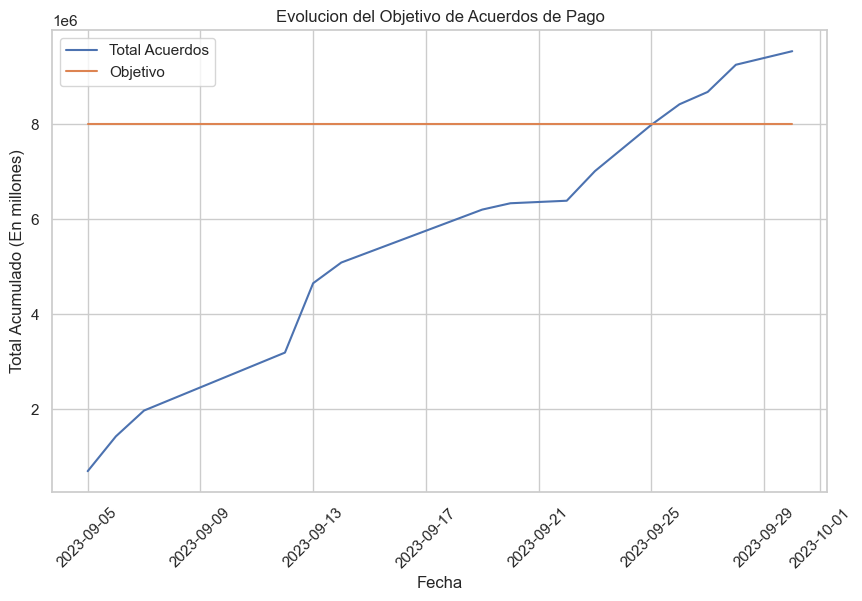

In [7]:
# creo un df con el total acumulado de acuerdos de pago por día
acuerdos_por_dia = con_compromiso.groupby('date')['Cantidad'].sum().cumsum().reset_index()

# creo un df con el objetivo acumulado por día (constante en este caso)
acuerdos_por_dia['Objetivo'] = 8000000


# Configuro la visualizacion

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=acuerdos_por_dia, x='date', y='Cantidad', label='Total Acuerdos')
sns.lineplot(data=acuerdos_por_dia, x='date', y='Objetivo', label='Objetivo')


plt.title('Evolucion del Objetivo de Acuerdos de Pago')
plt.xlabel('Fecha')
plt.ylabel('Total Acumulado (En millones)')

plt.legend()

plt.xticks(rotation=45)

plt.show()

In [8]:
# Metrica del objetivo

objetivo = 8000000
metrica_objetivo = (total_acuerdos_septiembre / objetivo) * 100
metrica_objetivo


119.27077149999998

Durante el análisis de los datos del mes de septiembre, identifiqué un total de acuerdos de pago que alcanzaron $10,285,458.98. Sin embargo, observo que había duplicados en los registros. Esto puede atribuirse a diversos factores, como la participación de un mismo usuario en varias campañas o el incumplimiento de plazos.

Para obtener resultados más precisos, eliminé los duplicados y se conservé únicamente las propuestas más recientes que pertenecían a la misma deuda, siempre y cuando el monto fuera idéntico.

Como resultado, obtuve que en septiembre se alcanzó un total de $9,541,661.72 en acuerdos de pago. Este monto supera el objetivo establecido por el cliente, que era de $8,000,000.

En cuanto al cumplimiento del objetivo, el mes fue exitoso, ya que éste fué superado en un 19.27%.
Sin embargo para afirmar esto con mas precisión, me gustaría realizar las siguientes comparaciones:

1. Evaluar si el desempeño de septiembre es consistente con la media de acuerdos de pago a lo largo del año.

2. Comparar los resultados con septiembres de años anteriores para determinar si la mejora es sostenible.

3. Analizar cómo se compara septiembre con los otros meses del año en términos de acuerdos de pago.